In [8]:
import pandas as pd 
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt
import numpy as np
import os
import xlrd #para leer Excel
import PyPDF2 #para leer PDF
import tabula #para transformar PDF en tablas
import io
import sys
from wordcloud import WordCloud #importo la función de worldcloud
import matplotlib.pyplot as plt

In [9]:
print (os.getcwd())

/home/rodrigo/trifin


In [18]:
decretoEN = PyPDF2.PdfFileReader("exencioneconomianaranja.pdf")
NumPages = object.getNumPages() #acá tenemos el número de páginas
String = "economía naranja" #definimos palabras claves

In [19]:
for i in range(0, NumPages):
    PageObj = decretoEN.getPage(i)
    print("this is page " + str(i)) 
    Text = PageObj.extractText() #extraemos texto y buscamos "this is page"
    ResSearch = re.search(String, Text)
    print(ResSearch)

this is page 0
None
this is page 1
None
this is page 2
<_sre.SRE_Match object; span=(362, 378), match='economía naranja'>
this is page 3
<_sre.SRE_Match object; span=(2026, 2042), match='economía naranja'>
this is page 4
None
this is page 5
<_sre.SRE_Match object; span=(1671, 1687), match='economía naranja'>
this is page 6
None
this is page 7
<_sre.SRE_Match object; span=(1442, 1458), match='economía naranja'>
this is page 8
None
this is page 9
<_sre.SRE_Match object; span=(2201, 2217), match='economía naranja'>
this is page 10
None
this is page 11
None


In [20]:
print(decretoEN.numPages) #nos dice que el pdf tiene 12 páginas

12


In [37]:
pag_1 = decretoEN.getPage(0)
pag_2 = decretoEN.getPage(1)
print(pag_1.extractText()) #acá estamos imprimiendo páginas específicas (la pg 0 es la 1)

MINISTERIO DE HACIENDA Y CRÉDITO PÚBLICO DECRETO NÚMERO 1669 DE 12 SEP 2019 Por el cual se reglamenta el numeral 1 del artículo 235-2 del Estatuto Tributario y se adicionan unos artrculos al Capítulo 22 del Título 1 de la Parte 2 del Libro 1 del Decreto 1625 de 2016 Único Reglamentario en Materia Tributaria. EL PRESIDENTE DE LA REPÚBLICA DE COLOMBIA En uso de sus facultades constitucionales y legales, en especial las conferidas por los numerales 11 y 20 del artículo 189 de la Constitución Política, yen desarrollo del numeral 1 del artículo 235-2 del Estatuto Tributario, y CONSIDERANDO Que el Gobierno nacional expidió el Decreto 1625 
de 2016, Único Reglamentario en Materia Tributaria, para compilar y racionalizar las normas de carácter reglamentario y contar con instrumentos jurídicos únicos, sin perjuicio de las compilaciones realizadas en otros decretos únicos. Que el numeral 10 del artrculo 235-2 del Estatuto Tributario, modificado por el artículo 79 de la Ley 1943 de 2018, dispone:

In [22]:
num_topics=10 # Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo

In [26]:
type(pag_1)

PyPDF2.pdf.PageObject

In [27]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [28]:
comment_words = ' '
stopwords = set(STOPWORDS)

In [40]:
print(pag_1.extractText())

MINISTERIO DE HACIENDA Y CRÉDITO PÚBLICO DECRETO NÚMERO 1669 DE 12 SEP 2019 Por el cual se reglamenta el numeral 1 del artículo 235-2 del Estatuto Tributario y se adicionan unos artrculos al Capítulo 22 del Título 1 de la Parte 2 del Libro 1 del Decreto 1625 de 2016 Único Reglamentario en Materia Tributaria. EL PRESIDENTE DE LA REPÚBLICA DE COLOMBIA En uso de sus facultades constitucionales y legales, en especial las conferidas por los numerales 11 y 20 del artículo 189 de la Constitución Política, yen desarrollo del numeral 1 del artículo 235-2 del Estatuto Tributario, y CONSIDERANDO Que el Gobierno nacional expidió el Decreto 1625 
de 2016, Único Reglamentario en Materia Tributaria, para compilar y racionalizar las normas de carácter reglamentario y contar con instrumentos jurídicos únicos, sin perjuicio de las compilaciones realizadas en otros decretos únicos. Que el numeral 10 del artrculo 235-2 del Estatuto Tributario, modificado por el artículo 79 de la Ley 1943 de 2018, dispone:

In [42]:
x=pag_1.extractText().split()

In [46]:
unique_string=(" ").join(x)

In [49]:
unique_string

'MINISTERIO DE HACIENDA Y CRÉDITO PÚBLICO DECRETO NÚMERO 1669 DE 12 SEP 2019 Por el cual se reglamenta el numeral 1 del artículo 235-2 del Estatuto Tributario y se adicionan unos artrculos al Capítulo 22 del Título 1 de la Parte 2 del Libro 1 del Decreto 1625 de 2016 Único Reglamentario en Materia Tributaria. EL PRESIDENTE DE LA REPÚBLICA DE COLOMBIA En uso de sus facultades constitucionales y legales, en especial las conferidas por los numerales 11 y 20 del artículo 189 de la Constitución Política, yen desarrollo del numeral 1 del artículo 235-2 del Estatuto Tributario, y CONSIDERANDO Que el Gobierno nacional expidió el Decreto 1625 de 2016, Único Reglamentario en Materia Tributaria, para compilar y racionalizar las normas de carácter reglamentario y contar con instrumentos jurídicos únicos, sin perjuicio de las compilaciones realizadas en otros decretos únicos. Que el numeral 10 del artrculo 235-2 del Estatuto Tributario, modificado por el artículo 79 de la Ley 1943 de 2018, dispone:

In [60]:
from nltk.corpus import stopwords
import nltk

In [61]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [72]:
decreto_completo="INICIO DEL DECRETO"
for i in range(0, NumPages):
    page=decretoEN.getPage(i)
    decreto_completo=decreto_completo+" "+page.extractText()

In [75]:
decreto_completo

'INICIO DEL DECRETO MINISTERIO DE HACIENDA Y CRÉDITO PÚBLICO DECRETO NÚMERO 1669 DE 12 SEP 2019 Por el cual se reglamenta el numeral 1 del artículo 235-2 del Estatuto Tributario y se adicionan unos artrculos al Capítulo 22 del Título 1 de la Parte 2 del Libro 1 del Decreto 1625 de 2016 Único Reglamentario en Materia Tributaria. EL PRESIDENTE DE LA REPÚBLICA DE COLOMBIA En uso de sus facultades constitucionales y legales, en especial las conferidas por los numerales 11 y 20 del artículo 189 de la Constitución Política, yen desarrollo del numeral 1 del artículo 235-2 del Estatuto Tributario, y CONSIDERANDO Que el Gobierno nacional expidió el Decreto 1625 \nde 2016, Único Reglamentario en Materia Tributaria, para compilar y racionalizar las normas de carácter reglamentario y contar con instrumentos jurídicos únicos, sin perjuicio de las compilaciones realizadas en otros decretos únicos. Que el numeral 10 del artrculo 235-2 del Estatuto Tributario, modificado por el artículo 79 de la Ley 1

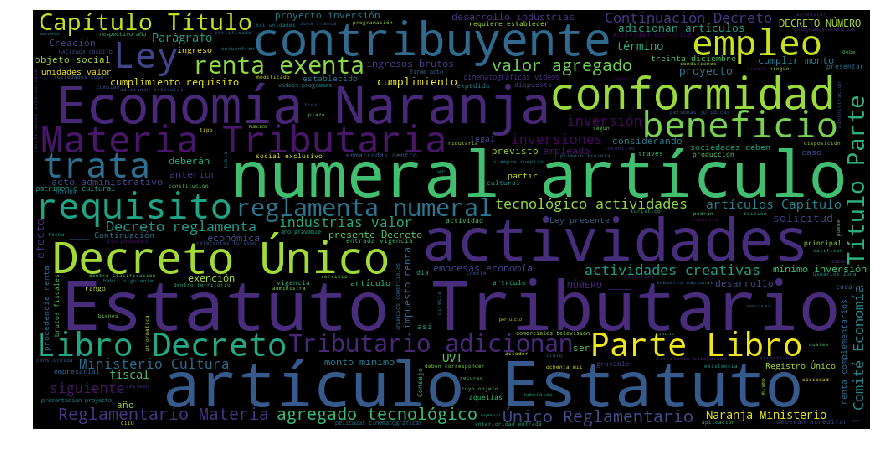

In [74]:
wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords.words("spanish")).generate(decreto_completo)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [76]:
from tabula import read_pdf

In [80]:
codigos=read_pdf("exencioneconomianaranja.pdf")

'pages' argument isn't specified.Will extract only from page 1 by default.


In [78]:
codigos

[]